# 27th August

In [1]:
import pandas as pd

#Load the Data
from sklearn.datasets import load_iris

In [2]:
#Load iris dataset
iris = load_iris()
df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df["Species"] = iris.target
# pip install -U scikit-learn

df["Species"] = df["Species"].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


In [3]:
#Explore the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
#Summary statistics or describing data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Class distributions of the flowers/data
df["Species"].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

# EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

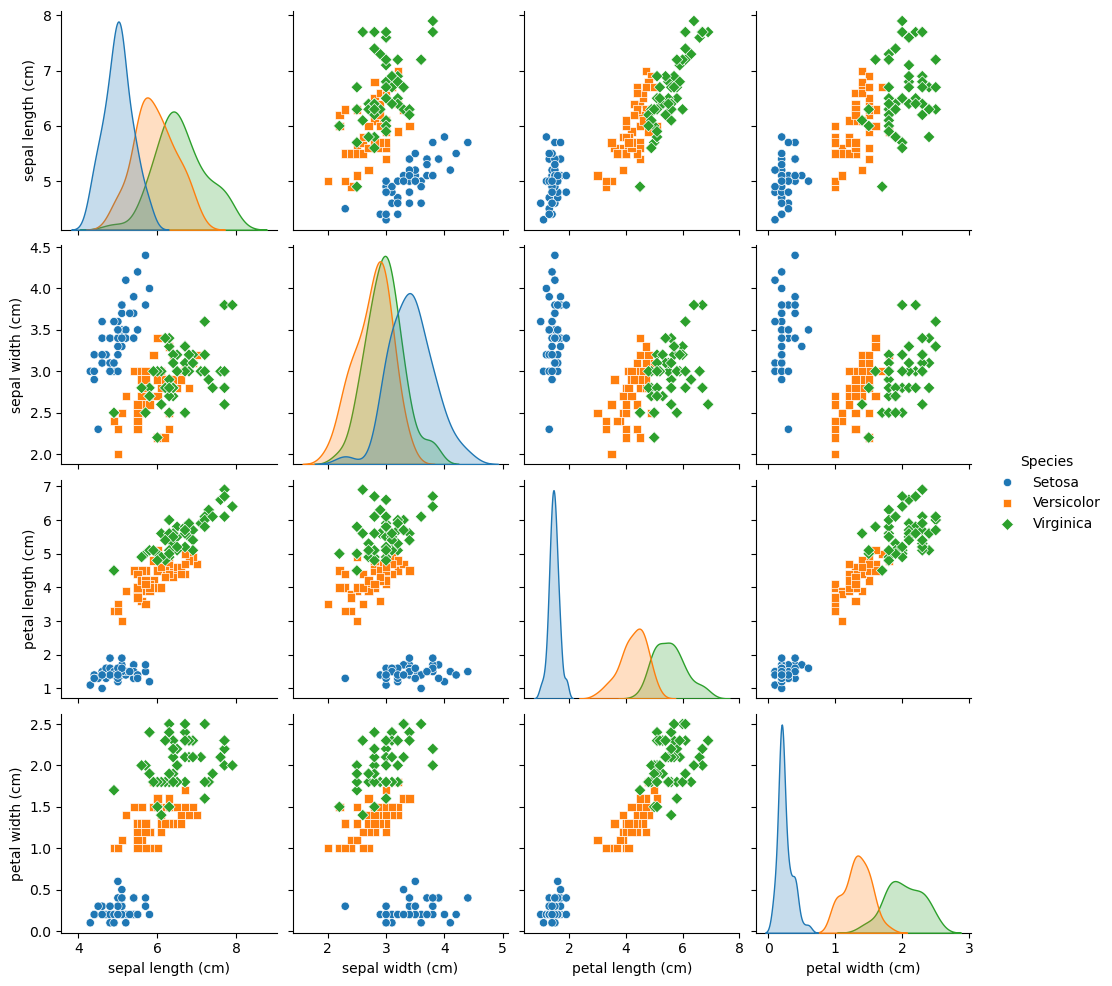

In [7]:
#Pairplot
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'])
plt.show()

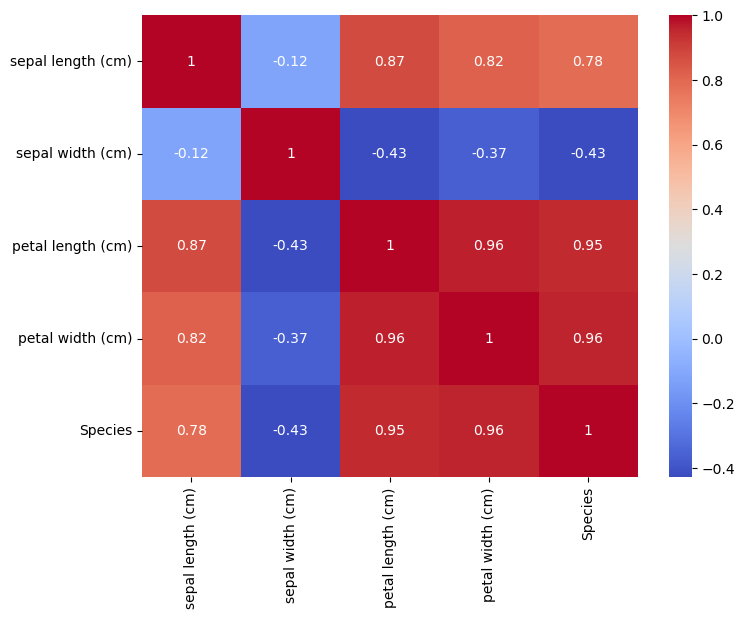

In [8]:
#Heatmap of the correlation matrix
plt.figure(figsize=(8,6))
data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
data['Species'] = iris.target #to display correlation of species with other bits
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
#Initialize the data
X = df.drop('Species', axis=1)
y = df['Species']

In [13]:
#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Standarize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
#Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
#Make predictions
y_pred = model.predict(X_test)

In [18]:
#Evaluate the model
score = accuracy_score(y_test, y_pred)
score

1.0

In [19]:
#Classification Report
print(f"Classification Report: \n\n {classification_report(y_test, y_pred)}")

Classification Report: 

               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
#Confusion Matrix
print(f"Confusion Matrix: \n\n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix: 

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
